# ESM Demo

In [1]:
import torch
import esm

/home/niejianzheng/anaconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Load ESM-1b model
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results


/home/niejianzheng/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/nn/modules/module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


In [19]:
# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1",
     "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2",
     "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"
     ),
    ("protein2 with mask",
     "KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"
     ),
    ("protein3", "K A <mask> I S Q"),

]

In [20]:
seq_len_list = [(key, len(val)) for (key, val) in data]
print(seq_len_list)

[('protein1', 65), ('protein2', 71), ('protein2 with mask', 76), ('protein3', 16)]


In [21]:
batch_labels, batch_strs, batch_tokens = batch_converter(data)
batch_tokens

tensor([[ 0, 20, 15, 11,  7, 10, 16,  9, 10,  4, 15,  8, 12,  7, 10, 12,  4,  9,
         10,  8, 15,  9, 14,  7,  8,  6,  5, 16,  4,  5,  9,  9,  4,  8,  7,  8,
         10, 16,  7, 12,  7, 16, 13, 12,  5, 19,  4, 10,  8,  4,  6, 19, 17, 12,
          7,  5, 11, 14, 10,  6, 19,  7,  4,  5,  6,  6,  2,  1,  1,  1,  1,  1,
          1],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 21,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,
          2],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 32,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,


In [24]:
print(batch_tokens.shape)

torch.Size([4, 73])


In [35]:
protein="MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQGKPLEFGATSAALQPEEEQEEDWLDDDSQQTVGQQDGSEDNQTTTIQTIVEVQPQLEMELTPVVQTIEVNSFSGYLKLTDNVYIKNADIVEEAKKVKPTVVVNAANVYLKHGGGVAGALNKATNNAMQVESDDYIATNGPLKVGGSCVLSGHNLAKHCLHVVGPNVNKGEDIQLLKSAYENFNQHEVLLAPLLSAGIFGADPIHSLRVCVDTVRTNVYLAVFDKNLYDKLVSSFLEMKSEKQVEQKIAEIPKEEVKPFITESKPSVEQRKQDDKKIKACVEEVTTTLEETKFLTENLLLYIDINGNLHPDSATLVSDIDITFLKKDAPYIVGDVVQEGVLTAVVIPTKKAGGTTEMLAKALRKVPTDNYITTYPGQGLNGYTVEEAKTVLKKCKSAFYILPSIISNEKQEILGTVSWNLREMLAHAEETRKLMPVCVETKAIVSTIQRKYKGIKIQEGVVDYGARFYFYTSKTTVASLINTLNDLNETLVTMPLGYVTHGLNLEEAARYMRSLKVPATVSVSSPDAVTAYNGYLTSSSKTPEEHFIETISLAGSYKDWSYSGQSTQLGIEFLKRGDKSVYYTSNPTTFHLDGEVITFDNLKTLLSLREVRTIKVFTTVDNINLHTQVVDMSMTYGQQFGPTYLDGADVTKIKPHNSHEGKTFYVLPNDDTLRVEAFEYYHTTDPSFLGRYMSALNHTKKWKYPQVNGLTSIKWADNNCYLATALLTLQQIELKFNPPALQDAYYRARAGEAANFCALILAYCNKTVGELGDVRETMSYLFQHANLDSCKRVLNVVCKTCGQQQTTLKGVEAVMYMGTLSYEQFKKGVQIPCTCGKQATKYLVQQESPFVMMSAPPAQYELKHGTFTCASEYTGNYQCGHYKHITSKETLYCIDGALLTKSSEYKGPITDVFYKENSYTTTIKPVTYKLDGVVCTEIDPKLDNYYKKDNSYFTEQPIDLVPNQPYPNASFDNFKFVCDNIKFADDLNQLTGYKKPASRELKVTFFPDLNGDVVAIDYKHYTPSFKKGAKLLHKPIVWHVNNATNKATYKPNTWCIRCLWSTKPVETSNSFDVLKSEDAQGMDNLACEDLKPVSEEVVENPTIQKDVLECNVKTTEVVGDIILKPANNSLKITEEVGHTDLMAAYVDNSSLTIKKPNELSRVLGLKTLATHGLAAVNSVPWDTIANYAKPFLNKVVSTTTNIVTRCLNRVCTNYMPYFFTLLLQLCTFTRSTNSRIKASMPTTIAKNTVKSVGKFCLEASFNYLKSPNFSKLINIIIWFLLLSVCLGSLIYSTAALGVLMSNLGMPSYCTGYREGYLNSTNVTIATYCTGSIPCSVCLSGLDSLDTYPSLETIQITISSFKWDLTAFGLVAEWFLAYILFTRFFYVLGLAAIMQLFFSYFAVHFISNSWLMWLIINLVQMAPISAMVRMYIFFASFYYVWKSYVHVVDGCNSSTCMMCYKRNRATRVECTTIVNGVRRSFYVYANGGKGFCKLHNWNCVNCDTFCAGSTFISDEVARDLSLQFKRPINPTDQSSYIVDSVTVKNGSIHLYFDKAGQKTYERHSLSHFVNLDNLRANNTKGSLPINVIVFDGKSKCEESSAKSASVYYSQLMCQPILLLDQALVSDVGDSAEVAVKMFDAYVNTFSSTFNVPMEKLKTLVATAEAELAKNVSLDNVLSTFISAARQGFVDSDVETKDVVECLKLSHQSDIEVTGDSCNNYMLTYNKVENMTPRDLGACIDCSARHINAQVAKSHNIALIWNVKDFMSLSEQLRKQIRSAAKKNNLPFKLTCATTRQVVNVVTTKIALKGGKIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGYKAIDGGVTRDIASTDTCFANKHADFDTWFSQRGGSYTNDKACPLIAAVITREVGFVVPGLPGTILRTTNGDFLHFLPRVFSAVGNICYTPSKLIEYTDFATSACVLAAECTIFKDASGKPVPYCYDTNVLEGSVAYESLRPDTRYVLMDGSIIQFPNTYLEGSVRVVTTFDSEYCRHGTCERSEAGVCVSTSGRWVLNNDYYRSLPGVFCGVDAVNLLTNMFTPLIQPIGALDISASIVAGGIVAIVVTCLAYYFMRFRRAFGEYSHVVAFNTLLFLMSFTVLCLTPVYSFLPGVYSVIYLYLTFYLTNDVSFLAHIQWMVMFTPLVPFWITIAYIICISTKHFYWFFSNYLKRRVVFNGVSFSTFEEAALCTFLLNKEMYLKLRSDVLLPLTQYNRYLALYNKYKYFSGAMDTTSYREAACCHLAKALNDFSNSGSDVLYQPPQTSITSAVLQSGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTFQSAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFAMGIIAMSAFAMMFVKHKHAFLCLFLLPSLATVAYFNMVYMPASWVMRIMTWLDMVDTSLSGFKLKDCVMYASAVVLLILMTARTVYDDGARRVWTLMNVLTLVYKVYYGNALDQAISMWALIISVTSNYSGVVTTVMFLARGIVFMCVEYCPIFFITGNTLQCIMLVYCFLGYFCTCYFGLFCLLNRYFRLTLGVYDYLVSTQEFRYMNSQGLLPPKNSIDAFKLNIKLLGVGGKPCIKVATVQSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATLQAIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAKSEFDRDAAMQRKLEKMADQAMTQMYKQARSEDKRAKVTSAMQTMLFTMLRKLDNDALNNIINNARDGCVPLNIIPLTTAAKLMVVIPDYNTYKNTCDGTTFTYASALWEIQQVVDADSKIVQLSEISMDNSPNLAWPLIVTALRANSAVKLQNNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLSDLQDLKWARFPKSDGTGTIYTELEPPCRFVTDTPKGPKVKYLYFIKGLNNLNRGMVLGSLAATVRLQAGNATEVPANSTVLSFCAFAVDAAKAYKDYLASGGQPITNCVKMLCTHTGTGQAITVTPEANMDQESFGGASCCLYCRCHIDHPNPKGFCDLKGKYVQIPTTCANDPVGFTLKNTVCTVCGMWKGYGCSCDQLREPMLQSADAQSFLNGFAV"
# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein3", protein[:1022]), # <== Setting this to 1022 makes the code pass
]

In [36]:
batch_labels, batch_strs, batch_tokens = batch_converter(data)
batch_tokens

tensor([[ 0, 20, 15,  ...,  1,  1,  1],
        [ 0, 15,  5,  ...,  1,  1,  1],
        [ 0, 20,  9,  ..., 16, 11,  2]])

In [37]:
print(batch_tokens.shape)

torch.Size([3, 1024])


In [38]:
# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)

In [39]:
print(results.keys())

dict_keys(['logits', 'representations', 'attentions', 'contacts'])


In [40]:
token_representations = results["representations"][33]

# batch_size * seq_length * embedding_dim
print(token_representations.shape)

torch.Size([3, 1024, 1280])


In [41]:
# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1:len(seq) +
                                                          1].mean(0))
sequence_representations
print(sequence_representations[0].shape)

torch.Size([1280])


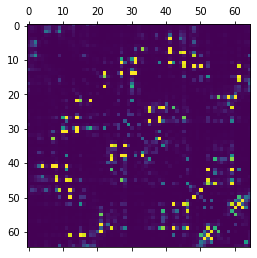

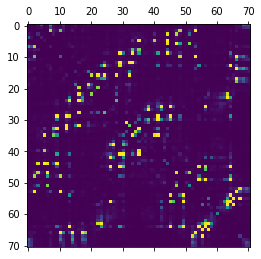

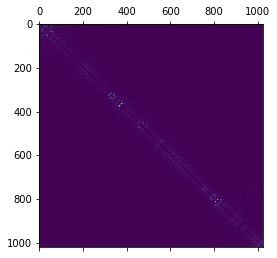

In [48]:
# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[:len(seq), :len(seq)])
    plt.show()

In [49]:
token_representations
token_representations.mean(1)

tensor([[-0.1148, -0.2098,  0.0235,  ..., -0.2215, -0.1323, -0.2044],
        [-0.0762, -0.1286,  0.0057,  ..., -0.0965,  0.2138,  0.1215],
        [-0.0252,  0.1007,  0.0489,  ...,  0.0470,  0.0798,  0.3295]])

In [50]:
embeddings = [emb for emb in token_representations]

In [51]:
embeddings

[tensor([[-0.0740,  0.0822,  0.2193,  ..., -0.0044,  0.0492, -0.1227],
         [ 0.0798,  0.0540,  0.1084,  ..., -0.0505, -0.3083, -0.0727],
         [ 0.2959, -0.4730, -0.0036,  ..., -0.0741, -0.0356,  0.2300],
         ...,
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165],
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165],
         [-0.1345, -0.2281,  0.0246,  ..., -0.2334, -0.1367, -0.2165]]),
 tensor([[-0.0447,  0.2140,  0.1737,  ...,  0.0023,  0.1281, -0.0192],
         [ 0.0304,  0.1029,  0.1069,  ..., -0.0171, -0.2542, -0.0119],
         [ 0.1783,  0.1450, -0.0456,  ..., -0.0765, -0.2040,  0.1652],
         ...,
         [-0.0943, -0.1472,  0.0063,  ..., -0.0976,  0.2309,  0.1313],
         [-0.0943, -0.1472,  0.0063,  ..., -0.0976,  0.2309,  0.1313],
         [-0.0943, -0.1472,  0.0063,  ..., -0.0976,  0.2309,  0.1313]]),
 tensor([[-0.1947,  0.1641,  0.0843,  ...,  0.1581, -0.0661, -0.0890],
         [-0.0180, -0.0615,  0.2506,  ...,  0

In [52]:
lengths = torch.tensor([3,4,5,6])
filtered_embeddings = [
    emb[1:(length + 1), :]
    for emb, length in zip(embeddings, lengths)
]
filtered_embeddings

[tensor([[ 0.0798,  0.0540,  0.1084,  ..., -0.0505, -0.3083, -0.0727],
         [ 0.2959, -0.4730, -0.0036,  ..., -0.0741, -0.0356,  0.2300],
         [ 0.4061,  0.1483,  0.1694,  ..., -0.0198, -0.1599, -0.2346]]),
 tensor([[ 0.0304,  0.1029,  0.1069,  ..., -0.0171, -0.2542, -0.0119],
         [ 0.1783,  0.1450, -0.0456,  ..., -0.0765, -0.2040,  0.1652],
         [ 0.4702, -0.1670,  0.0034,  ..., -0.0758,  0.1202,  0.1645],
         [ 0.2439,  0.3574,  0.0725,  ...,  0.1642,  0.0400, -0.2980]]),
 tensor([[-0.0180, -0.0615,  0.2506,  ...,  0.0127, -0.1825,  0.0350],
         [ 0.1712, -0.0216, -0.0453,  ..., -0.1626,  0.0419,  0.4005],
         [-0.0294,  0.0780,  0.2672,  ...,  0.0592,  0.0558,  0.1735],
         [ 0.0922,  0.0293, -0.0773,  ...,  0.0851, -0.0185,  0.2574],
         [ 0.0939,  0.0791, -0.0446,  ...,  0.1402, -0.0811,  0.3044]])]